## Importing libraries

In [2]:
from joblib import dump, load

In [3]:
from keras.layers import Bidirectional, Conv1D, MaxPooling1D, Flatten

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score

In [5]:
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

In [6]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM
from keras.models import Sequential

In [7]:
from tensorflow.keras.layers import GRU
from tensorflow.keras.callbacks import ModelCheckpoint

In [8]:
from tensorflow.keras.layers import Dropout
import joblib

In [9]:
from matplotlib import pyplot as plt

## Data preprocessing

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/FYP/final_dataset.csv")

In [ ]:
dataset.head(5)

,State_Name,District_Name,Crop_Year,Season,Area,Production,temperature,pH,rainfall,crop
0,Andhra Pradesh,ANANTAPUR,1997,Kharif,21400.0,2600.0,30.015194,6.540823,60.740755,arhar/tur
1,Andhra Pradesh,CHITTOOR,1997,Kharif,6100.0,900.0,34.173228,6.539902,64.741612,arhar/tur
2,Andhra Pradesh,EAST GODAVARI,1997,Kharif,1600.0,300.0,32.066133,6.330119,62.227814,arhar/tur
3,Andhra Pradesh,GUNTUR,1997,Kharif,28400.0,14900.0,32.472997,6.461273,60.810195,arhar/tur
4,Andhra Pradesh,GUNTUR,1997,Rabi,1800.0,1000.0,32.270221,6.481504,63.154169,arhar/tur


In [ ]:
dataset = dataset.drop(["State_Name", "District_Name", "Production"], axis=1)

In [ ]:
# Perform one-hot encoding
new_dataset = pd.get_dummies(dataset, columns=['Season'])
new_dataset.head(2)

,Crop_Year,Area,temperature,pH,rainfall,crop,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter
0,1997,21400.0,30.015194,6.540823,60.740755,arhar/tur,0,1,0,0,0,0
1,1997,6100.0,34.173228,6.539902,64.741612,arhar/tur,0,1,0,0,0,0


In [ ]:
print(f"Number of instances in the dataset: {dataset.shape[0]}")

Number of instances in the dataset: 157639


In [ ]:
features = new_dataset.drop("crop", axis=1)
labels = dataset["crop"]

In [ ]:
print("List of classes/crops")
for x in labels.unique():
  print(x)

List of classes/crops
arhar/tur
bajra
cotton(lint)
dry chillies
gram
groundnut
jowar
maize
moong(green gram)
onion
peas & beans (pulses)
potato
rapeseed &mustard
rice
sesamum
small millets
sugarcane
sunflower
urad
wheat


In [ ]:
print("Number of crops: ",len(labels.unique()))

Number of crops:  20


In [ ]:
Encoder = LabelEncoder()
labels = Encoder.fit_transform(labels)

In [ ]:
features.drop("Season_Autumn     ", axis=1, inplace=True)
features.drop(["Crop_Year"], axis=1, inplace=True)
features.drop(["Area"], axis=1, inplace=True)

In [ ]:
features.head(2)

,temperature,pH,rainfall,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter
0,30.015194,6.540823,60.740755,1,0,0,0,0
1,34.173228,6.539902,64.741612,1,0,0,0,0


In [ ]:
features_2015 = features[157161:157639]
labels_2015 = labels[157161:157639]

In [ ]:
print(f"Number of features: {features.shape[1]}: ")

Number of features: 8: 


In [ ]:
model2000 = tf.keras.models.load_model("/content/drive/MyDrive/FYP/Trained Models/1999.keras")
model2000 = tf.keras.models.load_model("/content/drive/MyDrive/FYP/Trained Models/2000.keras")
model2001 = tf.keras.models.load_model("/content/drive/MyDrive/FYP/Trained Models/2001.keras")
model2002 = tf.keras.models.load_model("/content/drive/MyDrive/FYP/Trained Models/2002.keras")
model2003 = tf.keras.models.load_model("/content/drive/MyDrive/FYP/Trained Models/2003.keras")
model2004 = tf.keras.models.load_model("/content/drive/MyDrive/FYP/Trained Models/2004.keras")
model2005 = tf.keras.models.load_model("/content/drive/MyDrive/FYP/Trained Models/2005.keras")
model2006 = tf.keras.models.load_model("/content/drive/MyDrive/FYP/Trained Models/2006.keras")
model2007 = tf.keras.models.load_model("/content/drive/MyDrive/FYP/Trained Models/2007.keras")
model2008 = tf.keras.models.load_model("/content/drive/MyDrive/FYP/Trained Models/2008.keras")
model2009 = tf.keras.models.load_model("/content/drive/MyDrive/FYP/Trained Models/2009.keras")
model2010 = tf.keras.models.load_model("/content/drive/MyDrive/FYP/Trained Models/2010.keras")
model2011 = tf.keras.models.load_model("/content/drive/MyDrive/FYP/Trained Models/2011.keras")
model2012 = tf.keras.models.load_model("/content/drive/MyDrive/FYP/Trained Models/2012.keras")
model2013 = tf.keras.models.load_model("/content/drive/MyDrive/FYP/Trained Models/2013.keras")
model2014 = tf.keras.models.load_model("/content/drive/MyDrive/FYP/Trained Models/2014.keras")
model2015 = tf.keras.models.load_model("/content/drive/MyDrive/FYP/Trained Models/2015.keras")

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))

In [ ]:
features_2015 = sc.fit_transform(features_2015.to_numpy())

In [ ]:
# Saving minmax scaler object
joblib.dump(sc, '/content/drive/MyDrive/FYP/scaler.joblib')

['/content/drive/MyDrive/FYP/scaler.joblib']

In [ ]:
predictions = model2015(features_2015)

In [ ]:
features_2015.shape

(478, 8)

In [ ]:
type(features_2015)

numpy.ndarray

In [ ]:
# Convert softmax output to predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(labels_2015, predicted_labels)

In [ ]:
accuracy

0.8556485355648535

In [ ]:
kf = StratifiedKFold(n_splits=2)

In [ ]:
for x, y in kf.split(features_2015, labels_2015):
  fold1 = x, y

In [ ]:
# First iteration of Stratified KFold
# Training set of fold 1:
i = 0
for x in fold1[0]:
  if i == 0:
    X_train = features_2015[x]
    y_train = labels_2015[x]
    i += 1
  else:
    X_train = np.vstack((X_train, features_2015[x]))
    y_train = np.vstack((y_train, labels_2015[x]))
# Testing set of fold 1:
i = 0
for x in fold1[1]:
  if i == 0:
    X_test = features_2015[x]
    y_test = labels_2015[x]
    i += 1
  else:
    X_test = np.vstack((X_test, features_2015[x]))
    y_test = np.vstack((y_test, labels_2015[x]))

In [ ]:
np.zeros((20,))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [ ]:
def AllPredictions(x):
  RNNFeatures = np.zeros((20,))
  RNNFeatures = np.vstack((RNNFeatures, model2001(x)))
  RNNFeatures = np.vstack((RNNFeatures, model2002(x)))
  RNNFeatures = np.vstack((RNNFeatures, model2003(x)))
  RNNFeatures = np.vstack((RNNFeatures, model2004(x)))
  RNNFeatures = np.vstack((RNNFeatures, model2005(x)))
  RNNFeatures = np.vstack((RNNFeatures, model2006(x)))
  RNNFeatures = np.vstack((RNNFeatures, model2007(x)))
  RNNFeatures = np.vstack((RNNFeatures, model2008(x)))
  RNNFeatures = np.vstack((RNNFeatures, model2009(x)))
  RNNFeatures = np.vstack((RNNFeatures, model2010(x)))
  RNNFeatures = np.vstack((RNNFeatures, model2011(x)))
  RNNFeatures = np.vstack((RNNFeatures, model2012(x)))
  RNNFeatures = np.vstack((RNNFeatures, model2013(x)))
  RNNFeatures = np.vstack((RNNFeatures, model2014(x)))
  RNNFeatures = np.vstack((RNNFeatures, model2015(x)))
  return RNNFeatures[1:]

In [ ]:
# Training set
x1 = []
for i in X_train:
  x1.append(AllPredictions(i.reshape(1, 8)))
# Testing set
x2 = []
for i in X_test:
  x2.append(AllPredictions(i.reshape(1, 8)))

In [ ]:
x3 = []
for i in features_2015:
  x3.append(AllPredictions(i.reshape(1, 8)))

In [ ]:
Features2015 = []
for i in range(len(x3)):
  Features2015.append(x3[i])
Features2015 = np.array(Features2015)

In [ ]:
Features2015.shape

(478, 15, 20)

In [ ]:
x_train = []
x_test = []
for i in range(len(x1)): # Overall training set
  x_train.append(x1[i])
for i in range(len(x2)): # Overall testing set
  x_test.append(x2[i])

In [ ]:
Y_train = []
Y_test = []
for i in range(len(x1)):
  Y_train.append(y_train[i])
for i in range(len(x2)):
  Y_test.append(y_test[i])

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
x_test.shape

(239, 15, 20)

Splitting in validation and test sets

In [ ]:
x_valid = None
y_valid = None
X_test = None
Y_test = None

In [ ]:
for x, y in kf.split(x_test, y_test):
  x_valid, X_test = x_test[x], x_test[y]
  y_valid, Y_test = y_test[x], y_test[y]

In [ ]:
Y_test[0]

array([5])

In [ ]:
np.savez("GRU_final_dataset_2.npz", array1=x_train, array2=y_train, array3=x_valid, array4=y_valid, array5=X_test, array6=Y_test)

## Model Architecture

In [ ]:
final_model = Sequential()

In [ ]:
final_model.add(GRU(units=500, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
final_model.add(Dropout(0.5))
final_model.add(GRU(units=400, return_sequences=True))
final_model.add(Dropout(0.5)) # 0.8
final_model.add(GRU(units=300, return_sequences=True))
final_model.add(Dropout(0.5)) # 0.8
final_model.add(GRU(units=200, return_sequences=True))
final_model.add(Dropout(0.5)) # 0.8
final_model.add(GRU(units=200, return_sequences=True))
final_model.add(Dropout(0.5)) # 0.8
final_model.add(GRU(units=100))
final_model.add(Dropout(0.5)) # 0.8
final_model.add(Dense(units=20, activation="softmax"))

## GRU Training

In [ ]:
final_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])

In [ ]:
try:
  history = final_model.fit(x_train, y_train, epochs=100)
except Exception as e:
    # Handle a more general exception
    print(f"An error occurred: {e}")

Epoch 1/100
8/8 [==============================] - 16s 393ms/step - loss: 2.8986 - accuracy: 0.1046
Epoch 2/100
8/8 [==============================] - 3s 397ms/step - loss: 2.6366 - accuracy: 0.1381
Epoch 3/100
8/8 [==============================] - 5s 620ms/step - loss: 2.6280 - accuracy: 0.1297
Epoch 4/100
8/8 [==============================] - 3s 401ms/step - loss: 2.5217 - accuracy: 0.1464
Epoch 5/100
8/8 [==============================] - 3s 402ms/step - loss: 2.5371 - accuracy: 0.1297
Epoch 6/100
8/8 [==============================] - 4s 456ms/step - loss: 2.4998 - accuracy: 0.1799
Epoch 7/100
8/8 [==============================] - 4s 530ms/step - loss: 2.4261 - accuracy: 0.1841
Epoch 8/100
8/8 [==============================] - 3s 397ms/step - loss: 2.2757 - accuracy: 0.1757
Epoch 9/100
8/8 [==============================] - 3s 401ms/step - loss: 2.2002 - accuracy: 0.2385
Epoch 10/100
8/8 [==============================] - 4s 517ms/step - loss: 2.1126 - accuracy: 0.1967
Epoch 11

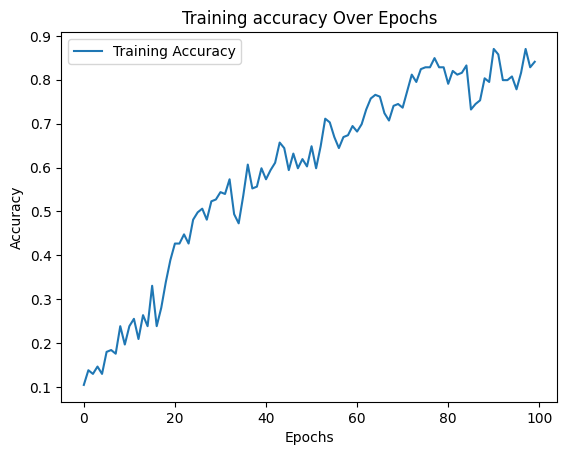

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy Over Epochs')
plt.legend()
plt.show()

In [ ]:
final_model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
try:
  final_model.fit(x_train, y_train, epochs=100)
except Exception as e:
    # Handle a more general exception
    print(f"An error occurred: {e}")

Epoch 1/100
8/8 [==============================] - 17s 409ms/step - loss: 0.4366 - accuracy: 0.8494
Epoch 2/100
8/8 [==============================] - 4s 489ms/step - loss: 0.3679 - accuracy: 0.8912
Epoch 3/100
8/8 [==============================] - 6s 853ms/step - loss: 0.3656 - accuracy: 0.8661
Epoch 4/100
8/8 [==============================] - 4s 501ms/step - loss: 0.3239 - accuracy: 0.8870
Epoch 5/100
8/8 [==============================] - 3s 402ms/step - loss: 0.3675 - accuracy: 0.8745
Epoch 6/100
8/8 [==============================] - 3s 394ms/step - loss: 0.3619 - accuracy: 0.8828
Epoch 7/100
8/8 [==============================] - 4s 573ms/step - loss: 0.3361 - accuracy: 0.8870
Epoch 8/100
8/8 [==============================] - 4s 402ms/step - loss: 0.3035 - accuracy: 0.8954
Epoch 9/100
8/8 [==============================] - 3s 402ms/step - loss: 0.3602 - accuracy: 0.8661
Epoch 10/100
8/8 [==============================] - 3s 404ms/step - loss: 0.3284 - accuracy: 0.9121
Epoch 11

In [ ]:
final_model.compile(optimizer=tf.keras.optimizers.Adam(0.00001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
try:
  final_model.fit(x_train, y_train, epochs=100)
except Exception as e:
    # Handle a more general exception
    print(f"An error occurred: {e}")

Epoch 1/100
8/8 [==============================] - 17s 397ms/step - loss: 0.2014 - accuracy: 0.9331
Epoch 2/100
8/8 [==============================] - 5s 583ms/step - loss: 0.1990 - accuracy: 0.9456
Epoch 3/100
8/8 [==============================] - 3s 395ms/step - loss: 0.1889 - accuracy: 0.9331
Epoch 4/100
8/8 [==============================] - 3s 401ms/step - loss: 0.1684 - accuracy: 0.9372
Epoch 5/100
8/8 [==============================] - 4s 454ms/step - loss: 0.1800 - accuracy: 0.9414
Epoch 6/100
8/8 [==============================] - 4s 530ms/step - loss: 0.1786 - accuracy: 0.9289
Epoch 7/100
8/8 [==============================] - 3s 402ms/step - loss: 0.2031 - accuracy: 0.9414
Epoch 8/100
8/8 [==============================] - 3s 406ms/step - loss: 0.2023 - accuracy: 0.9372
Epoch 9/100
8/8 [==============================] - 4s 540ms/step - loss: 0.1737 - accuracy: 0.9540
Epoch 10/100
8/8 [==============================] - 4s 435ms/step - loss: 0.2092 - accuracy: 0.9331
Epoch 11

In [ ]:
final_model.compile(optimizer=tf.keras.optimizers.Adam(0.000001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
try:
  final_model.fit(x_train, y_train, epochs=100)
except Exception as e:
    # Handle a more general exception
    print(f"An error occurred: {e}")

Epoch 1/100
8/8 [==============================] - 16s 403ms/step - loss: 0.1997 - accuracy: 0.9456
Epoch 2/100
8/8 [==============================] - 3s 399ms/step - loss: 0.1676 - accuracy: 0.9623
Epoch 3/100
8/8 [==============================] - 4s 554ms/step - loss: 0.1823 - accuracy: 0.9372
Epoch 4/100
8/8 [==============================] - 4s 423ms/step - loss: 0.1620 - accuracy: 0.9665
Epoch 5/100
8/8 [==============================] - 3s 405ms/step - loss: 0.1664 - accuracy: 0.9540
Epoch 6/100
8/8 [==============================] - 3s 404ms/step - loss: 0.1937 - accuracy: 0.9289
Epoch 7/100
8/8 [==============================] - 5s 626ms/step - loss: 0.1905 - accuracy: 0.9456
Epoch 8/100
8/8 [==============================] - 3s 401ms/step - loss: 0.1878 - accuracy: 0.9498
Epoch 9/100
8/8 [==============================] - 3s 394ms/step - loss: 0.1647 - accuracy: 0.9623
Epoch 10/100
8/8 [==============================] - 3s 396ms/step - loss: 0.1785 - accuracy: 0.9372
Epoch 11

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('GRU training accuracy Over Epochs')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('GRU training loss over Epochs')
plt.legend()
plt.show()

## Diagnostics

In [ ]:
test_loss, test_accuracy = final_model.evaluate(x_train, y_train)

print(f'Training Loss of GRU: {test_loss:.4f}')
print(f'Training Accuracy of GRU: {test_accuracy:.4f}')

8/8 [==============================] - 3s 110ms/step - loss: 0.1247 - accuracy: 0.9623
Training Loss of GRU: 0.1247
Training Accuracy of GRU: 0.9623


In [ ]:
test_loss, test_accuracy = final_model.evaluate(x_valid, y_valid)

print(f'Validation Loss of GRU: {test_loss:.4f}')
print(f'Validation Accuracy of GRU: {test_accuracy:.4f}')

4/4 [==============================] - 0s 105ms/step - loss: 0.9289 - accuracy: 0.7917
Validation Loss of GRU: 0.9289
Validation Accuracy of GRU: 0.7917


In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/FYP/Trained Models/FinalModel.keras")

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter=True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
tf.lite.OpsSet.SELECT_TF_OPS]

tfmodel = converter.convert()


In [ ]:
with open('converted_model.tflite', 'wb') as f:
    f.write(tfmodel)

In [ ]:
# final_model.save("/content/drive/MyDrive/FYP/Trained Models/gru2.keras")

In [ ]:
"""
test_loss, test_accuracy = final_model.evaluate(x_test, y_test)

print(f'Test Loss of GRU: {test_loss:.4f}')
print(f'Test Accuracy of GRU: {test_accuracy:.4f}')
"""

"\ntest_loss, test_accuracy = final_model.evaluate(x_test, y_test)\n\nprint(f'Test Loss of GRU: {test_loss:.4f}')\nprint(f'Test Accuracy of GRU: {test_accuracy:.4f}')\n"

## Results

In [ ]:
lstm = tf.keras.models.load_model("/content/drive/MyDrive/FYP/Trained Models/lstm.keras")

In [ ]:
gru = tf.keras.models.load_model("/content/drive/MyDrive/FYP/Trained Models/FinalModel.keras")

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(gru)
tflite_model = converter.convert()
# Save the TensorFlow Lite model to a file
with open('my_tflite_model.tflite', 'wb') as f:
    f.write(tflite_model)

ConverterError: /usr/lib/python3.10/runpy.py:196:1: error: 'tf.TensorListReserve' op requires element_shape to be static during TF Lite transformation pass
    return _run_code(code, main_globals, None,
^
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall"]): called from
/usr/lib/python3.10/runpy.py:196:1: error: failed to legalize operation 'tf.TensorListReserve' that was explicitly marked illegal
    return _run_code(code, main_globals, None,
^
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall"]): called from
<unknown>:0: error: Lowering tensor list ops is failed. Please consider using Select TF ops and disabling `_experimental_lower_tensor_list_ops` flag in the TFLite converter object. For example, converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]\n converter._experimental_lower_tensor_list_ops = False


In [ ]:
test_loss, test_accuracy = lstm.evaluate(x_valid, y_valid)

print(f'Validation Loss of GRU: {test_loss:.4f}')
print(f'Validation Accuracy of GRU: {test_accuracy:.4f}')


4/4 [==============================] - 3s 6ms/step - loss: 0.7383 - accuracy: 0.8000
Validation Loss of GRU: 0.7383
Validation Accuracy of GRU: 0.8000


In [ ]:
test_loss, test_accuracy = lstm.evaluate(x_test, y_test)

print(f'Test Loss of GRU: {test_loss:.4f}')
print(f'Test Accuracy of GRU: {test_accuracy:.4f}')


8/8 [==============================] - 0s 6ms/step - loss: 0.8021 - accuracy: 0.7908
Test Loss of GRU: 0.8021
Test Accuracy of GRU: 0.7908
